In [49]:
# @title ##**Mount drive** { display-mode: "form" }
from IPython.display import clear_output
from google.colab import drive
drive.mount("/content/drive/")
clear_output()
import os
import shutil
os.chdir("/content")
os.chdir("/content/drive/MyDrive")
Delete_old_folder= "Yes" #@param ['Yes', 'No']

if Delete_old_folder=="Yes":
  if os.path.isdir(f"/content/drive/MyDrive/Image_Art"):
    shutil.rmtree(f"/content/drive/MyDrive/Image_Art")
try:
  os.mkdir("Image_Art")
  os.chdir("/content/drive/MyDrive/Image_Art")
except:
  os.chdir("/content/drive/MyDrive/Image_Art")

root="/content/drive/MyDrive/Image_Art/"  
print("Every file save at this path:")
root

Every file save at this path:


'/content/drive/MyDrive/Image_Art/'

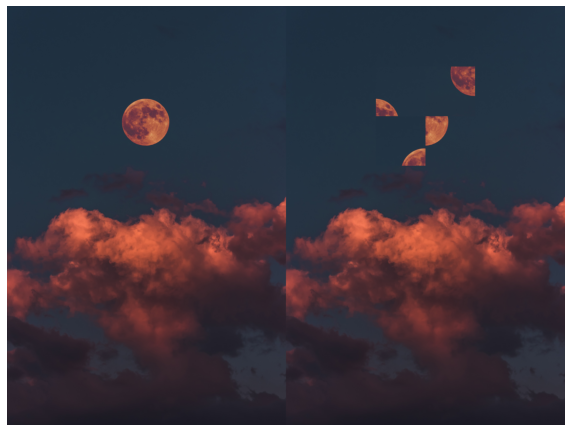

In [60]:
# @title ##**Fill the Form** { display-mode: "form" }
from PIL import Image, ImageDraw, ImageFont
import random
import uuid
from itertools import product
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np


def image_display(original_image,image):
  original_image=np.array(original_image) 
  image = np.array(image) 
  final_frame=cv2.hconcat((original_image, image))
  plt.figure(figsize=(10,10))
  plt.axis("off")
  plt.imshow(final_frame)
  plt.show()


def get_pos(width, height,position=None):
    rectangle_width = 1000 #@param {type: "number"}
    rectangle_height = 1000 #@param {type: "number"}
    rectangle_width = int(rectangle_width)
    rectangle_height =int(rectangle_height)
    if position=="center":
        x = (width - rectangle_width) // 2
        y = (height - rectangle_height) // 2
    elif position=="top":
        x = (width - rectangle_width) // 2
        y = 0
    elif position=="top_down":
        x = (width - rectangle_width) // 2
        y = (height - rectangle_height) // 2-rectangle_height        
    elif position=="bottom":
        x = (width - rectangle_width) // 2
        y = height - rectangle_height
    elif position=="bottom_up":
        x = (width - rectangle_width) // 2
        y = (height - rectangle_height) // 2+rectangle_height   
    elif position=="left":
        x = 0
        y = (height - rectangle_height) // 2
    elif position=="right":
        x = width - rectangle_width
        y = (height - rectangle_height) // 2
    
        
    else:
        x = (width - rectangle_width) // 2
        y = (height - rectangle_height) // 2
    rectangle_shape = (x, y,x + rectangle_width, y + rectangle_height)

    return rectangle_shape


def crop_big_rectangle(image,position=None):
    width, height = image.size
    copy_pos=get_pos(width, height,position=position)
    crop_image = image.crop(copy_pos)
    crop_image.save(f'{root}/big_rect.png')
    return crop_image

def tile(img,value=1):
    w, h = img.size
    d=w//value
    # d=6
    grid = list(product(range(0, h-h%d, d), range(0, w-w%d, d)))
    image_dict={}
    count=0
    my_list=[]
    image_list=[]
    for i, j in grid:
        bbox_image=[]
        box = (j, i, j+d, i+d)
        name = str(uuid.uuid1())
        out =f'./output/{name}.png'
        image_list.append(img.crop(box))
        # img.crop(box).save(out)
        bbox_image.append(box)
        image_dict[count]=bbox_image
        my_list.append(count)
        count=count+1
    return image_dict, my_list,image_list
        
def shuffle(nums):
    for i in range(len(nums)):
        j = random.randint(0, len(nums)-1)
        nums[i], nums[j] = nums[j], nums[i]
    return nums


def puzzle_image(image,image_dict,my_list,image_list):
    puzzle_list=shuffle(my_list)
    width, height = image.size
    new_image = Image.new('RGB', (width, height))  
    for i,j in enumerate(puzzle_list):
        img=image_list[i]
        bbox=image_dict[j][0]
        new_image.paste(img, bbox)
    return new_image

def utils(image,position=None,value=1):
    original_image=image.copy()
    width, height=image.size
    crop_big_rectangle(image,position=position)
    crop=crop_big_rectangle(image,position=position)
    image_dict,my_list,image_list=tile(crop,value=value)
    new_image=puzzle_image(crop,image_dict,my_list,image_list)
    rectangle_shape=get_pos(width, height,position=position)
    image.paste(new_image, rectangle_shape)
    name = str(uuid.uuid1())
    image.save(f'{root}{name}.png')
    image_display(original_image,image)
    return image
            

   


if __name__ == "__main__":
    image_upload= "paste_path" #@param ["Upload","paste_path"]
    image_path='/content/1.jpg'  #@param {type: "string"}
    if image_upload== "paste_path":
      image = Image.open(str(image_path))
    if image_upload== "Upload":
      uploaded = files.upload()
      clear_output()
      image_file_name=[]
      for fn in uploaded.keys():
        image_file_name.append(fn)
      image = Image.open(f'{root}{image_file_name[-1]}')
    pos=["center","top","bottom","left","right","top_down","bottom_up"]
    Select_Position= "top_down"#@param ["All","center","top","bottom","left","right","top_down","bottom_up"]
    box_divider_value = 2  #@param {type: "number"}
    if Select_Position== "All":
      for i in pos:
          img=image.copy()
          utils(img,position=i,value=int(box_divider_value))
    if Select_Position== "center":
      utils(image,position="center",value=int(box_divider_value))
    if Select_Position== "top":
      utils(image,position="top",value=int(box_divider_value))
    if Select_Position== "bottom":
      utils(image,position="bottom",value=int(box_divider_value))
    if Select_Position== "left":
      utils(image,position="left",value=int(box_divider_value))
    if Select_Position== "right":
      utils(image,position="right",value=int(box_divider_value))
    if Select_Position== "top_down":
      utils(image,position="top_down",value=int(box_divider_value))
    if Select_Position== "bottom_up":
      utils(image,position="bottom_up",value=int(box_divider_value))

    
